In [254]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

# Project Objectives

<div dir="rtl">
מטרת הפרויקט היא להבין מה הופך סרט ל"מצליח". האם זה השחקן הראשי? אולי הז’אנר, דירוג המבקרים או רמת הגבלת הצפייה? לאורך השנים היו אינספור סרטים שזכו להצלחה מסחררת לעומת אחרים שפחות – כאן אנסה לגלות מהם הגורמים שעשויים להסביר את ההבדלים, ומה בעצם מגדיר הצלחה: הכנסות גבוהות או אהבת הקהל?

<div dir="rtl">

    
 ### השאלות המחקריות שנעסוק בהן במהלך הפרויקט:

<div dir="rtl">
 1. האם יש השפעה על מגדר השחקן הראשי על הצלחת הסרט?

<div dir="rtl">
 2. האם הגבלת הצפייה של הסרט משפיעה על הצלחתו?

<div dir="rtl">
 3. האם קיים ז'אנר ספציפי של סרטים שניתן להגיד שגורף יותר את אהדת הקהל?

<div dir="rtl">
4. מה ההבדל בין דירוג הקהל לדירוג אנשי המקצוע וכמה הוא משפיע על הכנסות הסרט עצמו?

<div dir="rtl">
5.האם השנה בה יצא הסרט משפיעה על כמות ההכנסות? 

<div dir="rtl">


### כלים וטכניקות להצגת המסקנות:

<div dir="rtl">
במהלך הניתוח נעשה שימוש בספריית Pandas לביצוע ניתוחים סטטיסטיים ופעולות עיבוד נתונים, בשילוב עם Matplotlib ו־Seaborn להצגת התרשימים בצורה גרפית ומובנת.
עיבוד וניקוי נתונים, ניתוח סטטיסטי באמצעות Pandas, הצגה גרפית של נתונים ו-הפקת מסקנות מתוך הנתונים

<div dir="rtl">


### ניתוח נתונים ראשוני:

In [255]:
dfMovies= pd.read_csv('IMDB top 400.csv')

In [256]:
dfMovies.head(3)

,Unnamed: 0,Title,Year,Certificate,Duration,Genre,Rate,Metascore,LeadActor,Gross,Votes
0,0.0,The Shawshank Redemption,1994,R,142 min,Drama,9.3,80.0,M,$28.34M,"2,295,987"
1,1.0,The Godfather,1972,R,175 min,"Crime, Drama",9.2,100.0,M,$134.97M,"1,584,782"
2,2.0,The Dark Knight,2008,PG-13,152 min,"Action, Crime, Drama",9.0,84.0,M,$534.86M,"2,260,649"


<div dir="rtl">
ממבט ראשון על הטבלה ניתן להבחין כי הנתונים מוצגים באופן שיטתי וברור.
העמודות מחולקות לפי מאפייני הסרטים — שם הסרט, סיווג הצפייה (הגבלת גיל), משך הסרט, הז’אנר, דירוג הקהל, דירוג המבקרים, תיאור קצר של העלילה, צוות השחקנים, מגדר השחקן הראשי, מספר ההצבעות שניתנו לסרט, והכנסותיו הכוללות.
בכל שורה מופיעים הנתונים עבור סרט אחד. לדוגמה, בשורה הראשונה מוצג הסרט "The Godfather", שאורכו כ־175 דקות, דורג על ידי הקהל בציון 9.2, וזכה למעמד של אחד הסרטים המצליחים ביותר בכל הזמנים.

In [257]:
dfMovies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   398 non-null    float64
 1   Title        400 non-null    object 
 2   Year         400 non-null    int64  
 3   Certificate  391 non-null    object 
 4   Duration     400 non-null    object 
 5   Genre        400 non-null    object 
 6   Rate         400 non-null    float64
 7   Metascore    288 non-null    float64
 8   LeadActor    400 non-null    object 
 9    Gross       334 non-null    object 
 10  Votes        398 non-null    object 
dtypes: float64(3), int64(1), object(7)
memory usage: 34.5+ KB


<div dir="rtl">
בבחינה רחבה יותר של הנתונים באמצעות הפונקציה ‎info()‎ ניתן לראות את סך המידע הקיים בכל עמודה ואת סוג הנתונים שהיא מכילה. לדוגמה, מרבית העמודות כוללות 398 רשומות מלאות, דבר המעיד על שלמות גבוהה של הנתונים. לעומת זאת, בעמודת ‎Metascore‎ ניתן לזהות ערכים חסרים, מה שמעיד כי לא לכל הסרטים קיים דירוג מקצועי. בנוסף, ניתן לראות שסוג הנתונים בעמודה זו הוא ‎float64‎ – כלומר, ערכים מספריים רציפים.

<div dir="rtl">
    
### טיפול בנתונים:

In [258]:
dfMovies.dropna(axis=0,inplace=True)

In [259]:
dfMovies.drop('Unnamed: 0',axis=1,inplace=True)

In [260]:
dfMovies.reset_index(drop=True, inplace=True)
dfMovies.index = range(1, len(dfMovies) + 1)

In [261]:
dfMovies.rename(columns={' Gross': 'Gross'}, inplace=True)

In [262]:
dfMovies['Gross'] = (dfMovies['Gross'].replace('-', '0').replace('[\$,M]', '', regex=True).astype(float))           

<>:1: SyntaxWarning: invalid escape sequence '\$'
<>:1: SyntaxWarning: invalid escape sequence '\$'
C:\Users\שי\AppData\Local\Temp\ipykernel_19120\3621275581.py:1: SyntaxWarning: invalid escape sequence '\$'
  dfMovies['Gross'] = (dfMovies['Gross'].replace('-', '0').replace('[\$,M]', '', regex=True).astype(float))


In [263]:
dfMovies['LeadActor'] = dfMovies['LeadActor'].replace({'M': 'Male', 'F': 'Female'})

In [264]:
dfMovies

,Title,Year,Certificate,Duration,Genre,Rate,Metascore,LeadActor,Gross,Votes
1,The Shawshank Redemption,1994,R,142 min,Drama,9.3,80.0,Male,28.34,"2,295,987"
2,The Godfather,1972,R,175 min,"Crime, Drama",9.2,100.0,Male,134.97,"1,584,782"
3,The Dark Knight,2008,PG-13,152 min,"Action, Crime, Drama",9.0,84.0,Male,534.86,"2,260,649"
4,The Godfather: Part II,1974,R,202 min,"Crime, Drama",9.0,90.0,Male,57.30,"1,107,253"
5,The Lord of the Rings: The Return of the King,2003,PG-13,201 min,"Action, Adventure, Drama",8.9,94.0,Male,377.85,"1,614,369"
...,...,...,...,...,...,...,...,...,...,...
256,12 Monkeys,1995,R,129 min,"Mystery, Sci-Fi, Thriller",8.0,74.0,Male,57.14,"571,158"
257,Ghost in the Shell,1995,TV-MA,83 min,"Animation, Action, Crime",8.0,76.0,Female,0.52,"126,538"
258,The Nightmare Before Christmas,1993,PG,76 min,"Animation, Family, Fantasy",8.0,82.0,Male,75.08,"288,364"
259,Aladdin,1992,G,90 min,"Animation, Adventure, Comedy",8.0,86.0,Male,217.35,"367,489"


<div dir="rtl">
בוצע ניקוי בסיסי של הנתונים — הוסרו ערכים חסרים, וידאנו שאין ערכים/סימנים שיפריעו לביצוע חישובים בעתיד וסידרנו מחדש את מספור הרשומות למראה תקין. את התוצאה הסופית של הטבלה ניתן לראות בתא מעל

<div dir="rtl">


### ניתוח סטטיסטי:

In [265]:
dfMovies.describe()

,Year,Rate,Metascore,Gross
count,260.000000,260.000000,260.000000,260.000000
mean,1993.719231,8.238077,81.988462,89.180038
std,21.175358,0.243630,10.317913,127.138381
min,1927.000000,8.000000,61.000000,0.010000
25%,1984.000000,8.100000,74.000000,4.427500
50%,2000.000000,8.200000,82.000000,33.050000
75%,2009.250000,8.325000,90.000000,132.390000
max,2019.000000,9.300000,100.000000,858.370000


<div dir="rtl">
מטרה:
הצגת סטטיסטיקה תיאורית על כל עמודה מספרית — ממוצע, חציון, סטיית תקן ועוד.
כך ניתן לזהות חריגים (Outliers) או מגמות כלליות.

In [266]:
dfMovies[dfMovies['Certificate'] == 'PG-13']['Gross'].mean()

np.float64(209.0597727272727)

In [267]:
dfMovies[dfMovies['Certificate'] == 'R']['Gross'].mean()


np.float64(55.78492307692307)

In [268]:
dfMovies[dfMovies['Certificate'] == 'PG']['Gross'].mean()

np.float64(103.99648648648649)

In [269]:
dfMovies[dfMovies['Certificate'] == 'Approved']['Gross'].mean()


np.float64(11.59)

<div dir="rtl">
מטרה:
הצגת ההשפעה של הגבלת הצפייה-"Certificate" על הכנסות הסרט

In [270]:
dfMovies['Genre'].value_counts()

Genre
Drama                           24
Crime, Drama                    10
Biography, Drama, History        9
Drama, Romance                   9
Animation, Adventure, Comedy     9
                                ..
Action, Adventure, Thriller      1
Crime, Drama, Musical            1
Mystery, Sci-Fi, Thriller        1
Animation, Action, Crime         1
Drama, History, Thriller         1
Name: count, Length: 103, dtype: int64

In [271]:
dfMovies['Genre'].str.contains('Drama', case=False, na=False).sum()

np.int64(185)

In [272]:
dfMovies.loc[dfMovies['Gross'].idxmax()]

Title                Avengers: Endgame 
Year                               2019
Certificate                       PG-13
Duration                        181 min
Genre          Action, Adventure, Drama
Rate                                8.4
Metascore                          78.0
LeadActor                          Male
Gross                            858.37
Votes                           772,451
Name: 49, dtype: object

In [273]:
dfMovies.loc[dfMovies['Gross'].idxmin()]

Title          Dial M for Murder 
Year                         1954
Certificate                    PG
Duration                  105 min
Genre             Crime, Thriller
Rate                          8.2
Metascore                    75.0
LeadActor                    Male
Gross                        0.01
Votes                     154,901
Name: 129, dtype: object

<div dir="rtl">
מטרה:
הצגת הדומיננטיות של הז'אנר "Drama" בטבלה

In [274]:
dfMovies[dfMovies['LeadActor'] == 'Male']['Gross'].mean()

np.float64(95.68625)

In [275]:
dfMovies[dfMovies['LeadActor'] == 'Female']['Gross'].mean()

np.float64(57.24045454545453)

In [276]:
dfMovies['LeadActor'].value_counts()

LeadActor
Male      216
Female     44
Name: count, dtype: int64

In [277]:
dfMovies.loc[dfMovies['Rate'].idxmax()]

Title           The Shawshank Redemption 
Year                                 1994
Certificate                             R
Duration                          142 min
Genre                               Drama
Rate                                  9.3
Metascore                            80.0
LeadActor                            Male
Gross                               28.34
Votes                           2,295,987
Name: 1, dtype: object

In [278]:
dfMovies.loc[dfMovies['Rate'].idxmin()]

Title           Shoplifters
Year                   2018
Certificate               R
Duration            121 min
Genre          Crime, Drama
Rate                    8.0
Metascore              93.0
LeadActor            Female
Gross                  3.31
Votes                58,260
Name: 204, dtype: object

<div dir="rtl">
מטרה:
הצגת ההבדל בין ההכנסות לסרטים כאשר השחקן הראשי הוא גבר וכאשר היא אישה. בנוסף  להראות לנו את רוב המוחץ שהוא הגברים כשחקן ראשי.

In [279]:
dfMovies[['Year', 'Gross']].corr()

,Year,Gross
Year,1.000000,0.278537
Gross,0.278537,1.000000


<div dir="rtl">
מטרה:
הצגת קורולציה בין השנה וכמות ההכנסה של אותו סרט

In [280]:
dfMovies[['Rate','Metascore']].corr()

,Rate,Metascore
Rate,1.00000,0.16314
Metascore,0.16314,1.00000


In [281]:
dfMovies[['Rate','Metascore']].mean()

Rate          8.238077
Metascore    81.988462
dtype: float64

<div dir="rtl">
מטרה:
 להציג מצד אחד האם יש קורולציה בין דירוג הקהל ודירוג המבקרים ולעומת זאת בפועל להציג את הדירוג הממוצע של כל אחד מהם

<div dir="rtl">
    
### ניתוח מתקדם:

In [282]:
dfMovies.groupby('LeadActor')[['Gross', 'Rate']].agg(['mean', 'std'])

Gross                  Rate          
                mean         std      mean       std
LeadActor                                           
Female     57.240455   85.773592  8.131818  0.152152
Male       95.686250  133.227107  8.259722  0.253162

In [283]:
diff = dfMovies.groupby('LeadActor')['Gross'].mean().pct_change() * 100

In [284]:
diff

LeadActor
Female          NaN
Male      67.165427
Name: Gross, dtype: float64

<div dir="rtl">
מטרה:
 לבחון אם מגדר השחקן הראשי משפיע על הצלחת הסרט.
הפקודות מחשבות ממוצע ו־סטיית תקן של ההכנסות והדירוגים, גם באחוזים ומאפשרות לזהות פערים בין גברים לנשים

In [285]:
dfMovies.groupby('Certificate')[['Gross', 'Rate']].agg(['mean', 'count']).sort_values(('Gross','mean'), ascending=False)

Gross            Rate      
                   mean count      mean count
Certificate                                  
PG-13        209.059773    44  8.245455    44
G            166.394000    15  8.233333    15
PG           103.996486    37  8.229730    37
R             55.784923   130  8.253846   130
Passed        35.438571     7  8.171429     7
GP            16.220000     1  8.100000     1
Approved      11.590000    10  8.250000    10
Not Rated      0.824286    14  8.164286    14
TV-MA          0.520000     1  8.000000     1
TV-PG          0.110000     1  8.000000     1

<div dir="rtl">
מטרה:
בדיקה האם סיווג הצפייה (“PG”, “R”, “G” וכו’) משפיע על ההכנסות או הדירוגים.
העמודה count מאפשרת גם להבין כמה סרטים יש בכל קטגוריה

In [286]:
dfMovies.groupby('Genre')['Gross'].sum().nlargest(10)

Genre
Animation, Adventure, Comedy    2692.09
Action, Adventure, Drama        2265.93
Action, Adventure, Sci-Fi       2236.35
Action, Adventure               1100.32
Action, Adventure, Fantasy       918.63
Drama                            773.22
Action, Adventure, Comedy        696.25
Animation, Action, Adventure     692.42
Drama, Romance                   647.97
Drama, War                       609.84
Name: Gross, dtype: float64

In [287]:
dfMovies.groupby('Genre')[['Rate', 'Gross']].mean().sort_values('Rate', ascending=False)

,Rate,Gross
Genre,,
"Action, Sci-Fi",8.600000,188.160000
"Crime, Drama, Fantasy",8.600000,136.800000
"Action, Adventure, Drama",8.557143,323.704286
"Crime, Drama",8.550000,44.795000
Western,8.533333,8.806667
...,...,...
"Biography, Drama, Thriller",8.000000,91.130000
"Animation, Biography, Drama",8.000000,4.450000
"Drama, History, Thriller",8.000000,70.410000


<div dir="rtl">
מטרה:
 לזהות את הז’אנרים הפופולריים ביותר לפי דירוג הקהל, ולראות אם יש קשר להכנסות

In [288]:
dfMovies['RatingGap'] = dfMovies['Rate'] - (dfMovies['Metascore'] / 10)
dfMovies[['RatingGap', 'Gross']].corr()

,RatingGap,Gross
RatingGap,1.000000,0.153223
Gross,0.153223,1.000000


In [289]:
dfMovies['RatingGap'].describe()

count    260.000000
mean       0.039231
std        1.020750
min       -1.900000
25%       -0.725000
50%        0.000000
75%        0.800000
max        2.500000
Name: RatingGap, dtype: float64

<div dir="rtl">
מטרה:
מדידת פער בין הקהל למבקרים, ולבדוק אם סרטים עם פער גדול (לדוגמה, קהל אוהב – מבקרים פחות) מצליחים יותר או פחות כלכלית

In [290]:
dfMovies[['Rate','Metascore']].corr()

,Rate,Metascore
Rate,1.00000,0.16314
Metascore,0.16314,1.00000


<div dir="rtl">
מטרה:
בדיקת קשר בין הדירוגים של הקהל והמומחים

In [291]:
dfMovies.groupby('Year')['Gross'].mean().sort_index()

Year
1927      1.240000
1931      0.020000
1934      4.360000
1936      0.160000
1939    104.140000
           ...    
2015    193.530000
2016    140.202857
2017    122.177500
2018    191.822000
2019    171.417143
Name: Gross, Length: 76, dtype: float64

In [292]:
yearly = dfMovies.groupby('Year')['Gross'].mean().sort_index()
yearly_change = yearly.pct_change() * 100
yearly_change


Year
1927             NaN
1931      -98.387097
1934    21700.000000
1936      -96.330275
1939    64987.500000
            ...     
2015      146.806562
2016      -27.554975
2017      -12.856626
2018       57.002721
2019      -10.637392
Name: Gross, Length: 76, dtype: float64

<div dir="rtl">
מטרה:
פקודות שנועדו לבדוק אם יש מגמת עלייה או ירידה בהכנסות עם השנים

<div dir="rtl">

### ויזואליזציה:

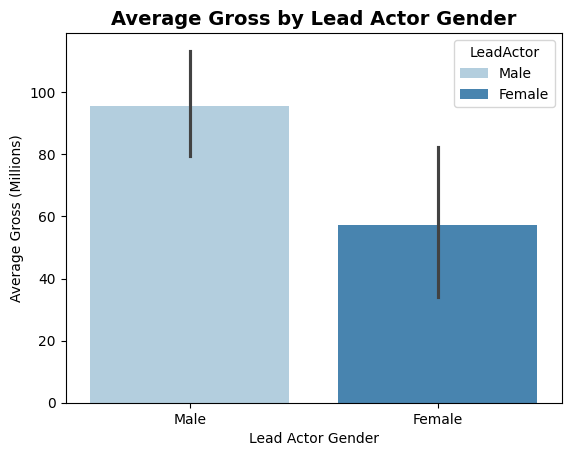

In [301]:
sb.barplot(data=dfMovies,
           x='LeadActor',
           y='Gross',
           hue='LeadActor',
           estimator='mean',
           palette='Blues',
           legend=True
)

plt.title('Average Gross by Lead Actor Gender', fontsize=14, fontweight='bold')
plt.xlabel('Lead Actor Gender')
plt.ylabel('Average Gross (Millions)')
plt.show()


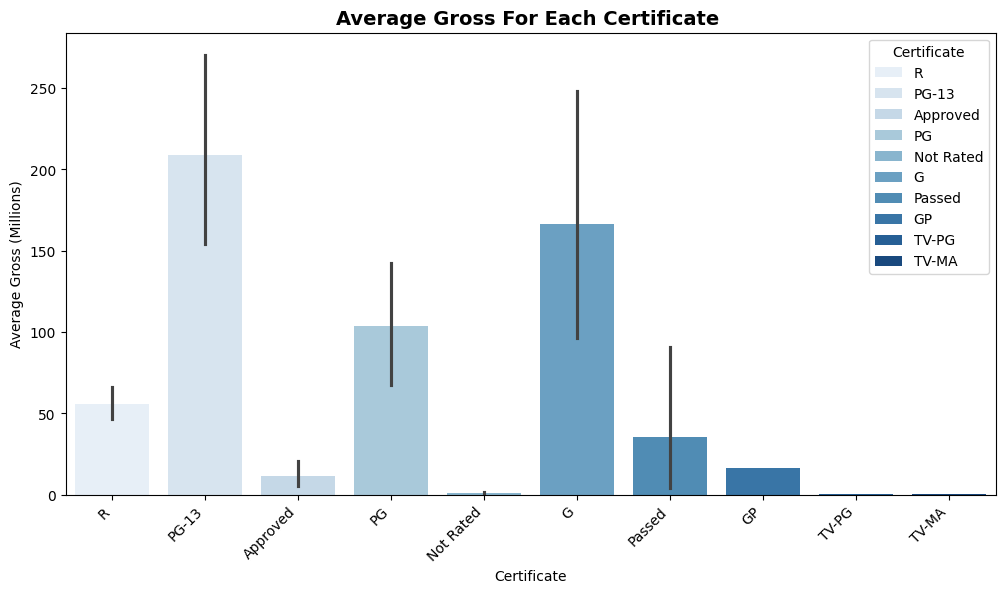

In [318]:
plt.figure(figsize=(12,6))

sb.barplot(data=dfMovies,
           x='Certificate',
           y='Gross',
           hue='Certificate',
           estimator='mean',
           palette='Blues',
           legend=True
)
plt.title('Average Gross For Each Certificate ', fontsize=14, fontweight='bold')
plt.xlabel('Certificate')
plt.ylabel('Average Gross (Millions)') 
plt.xticks(rotation=45, ha='right')
plt.show()

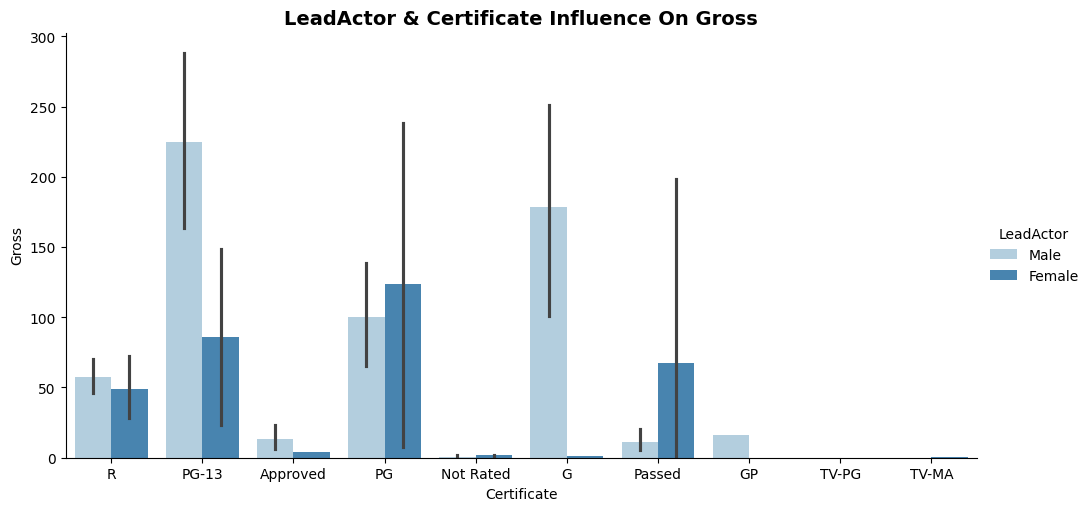

In [327]:
sb.catplot(
    data=dfMovies,
    x='Certificate',
    y='Gross',
    hue='LeadActor',
    palette='Blues',
    kind='bar',
    aspect=2
)
plt.title('LeadActor & Certificate Influence On Gross', fontsize=14, fontweight='bold')
plt.xlabel('Certificate')
plt.ylabel('Gross')
plt.show()

In [296]:
df_exploded = dfMovies.assign(Genre=dfMovies['Genre'].str.split(',')).explode('Genre')
df_exploded['Genre'] = df_exploded['Genre'].str.strip() 

In [297]:
avg_rate_by_genre = (
    df_exploded.groupby('Genre')['Rate']
    .mean()
    .sort_values(ascending=True)
)

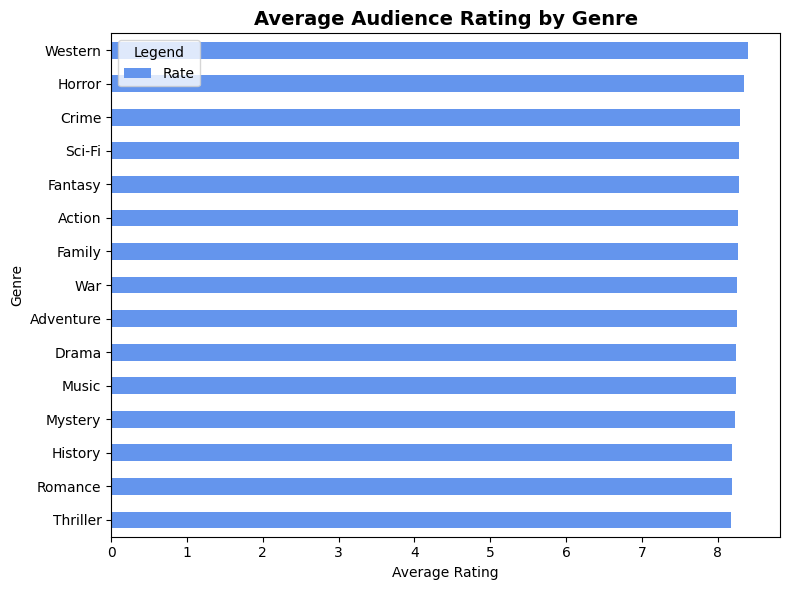

In [330]:
plt.figure(figsize=(8,6))

avg_rate_by_genre.tail(15).plot(
    kind='barh',
    color='cornflowerblue'
)
plt.title('Average Audience Rating by Genre', fontsize=14, fontweight='bold')
plt.xlabel('Average Rating')
plt.ylabel('Genre')
plt.tight_layout()
plt.legend(title='Legend',loc='upper left')
plt.show()

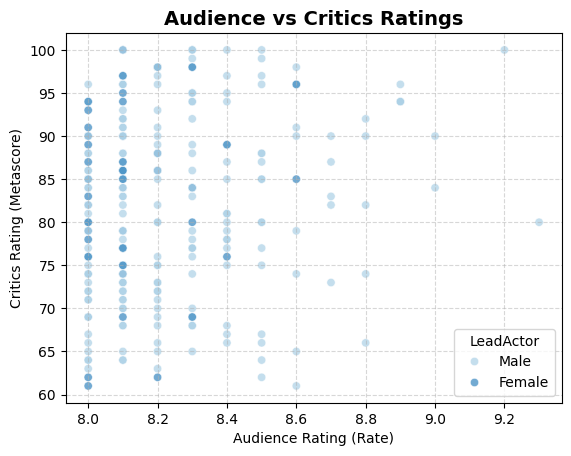

In [299]:
sb.scatterplot(data=dfMovies,
               x='Rate',
               y='Metascore',
               hue='LeadActor',
               palette='Blues',
               alpha=0.7
)
plt.title('Audience vs Critics Ratings', fontsize=14, fontweight='bold')
plt.xlabel('Audience Rating (Rate)')
plt.ylabel('Critics Rating (Metascore)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


C:\Users\שי\AppData\Local\Temp\ipykernel_19120\1115026095.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sb.lineplot(data=dfMovies,


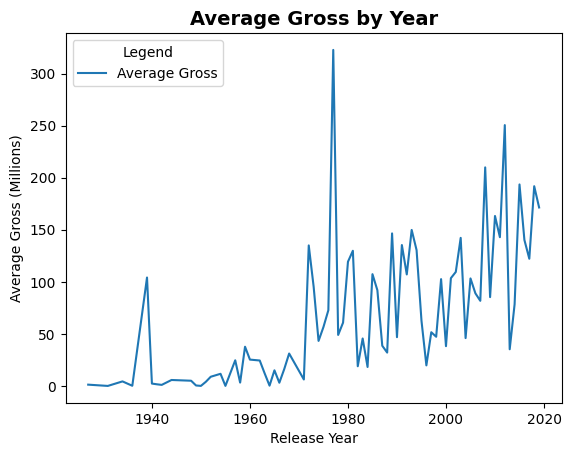

In [300]:
sb.lineplot(data=dfMovies,
            x='Year',
            y='Gross',
            estimator='mean',
            errorbar=None,       
            palette='Blues',
            label='Average Gross' 
)
plt.title('Average Gross by Year', fontsize=14, fontweight='bold')
plt.xlabel('Release Year')
plt.ylabel('Average Gross (Millions)')
plt.legend(title='Legend', loc='upper left')
plt.show()


<div dir="rtl">

### סיכום ומסקנות:

<div dir="rtl">
    
#### מסכנות מרכזיות מהניתוח

<div dir="rtl">
1.נמצא כי מגדר השחקן הראשי משפיע במידה מסוימת על הצלחת הסרטים — סרטים שבהם הגיבור הוא גבר הציגו בממוצע הכנסות גבוהות יותר. עם זאת, הדירוגים של הקהל והמבקרים אינם מצביעים על פער משמעותי, מה שמרמז כי ייתכן שההבדל נובע משיקולים מסחריים ולא מאיכות הסרט עצמה.

<div dir="rtl">
2.סיווג הצפייה (Certificate) הראה קשר ישיר להכנסות — סרטים בעלי סיווגים רחבים יותר כמו ‎PG‎ או ‎PG-13‎ נהנו ממכירות גבוהות יותר לעומת סיווגים מגבילים כמו ‎R‎.

<div dir="rtl">
3.בז’אנרים, נצפתה עליונות ברורה של סרטי Action, Adventure ו־Sci-Fi, שזכו לאהדת קהל גבוהה יותר וגם לממוצע הכנסות גבוה יחסית.

<div dir="rtl">
4.נמצא כי דירוג הקהל (Audience Rating) לא בהכרח תואם לדירוג המבקרים (Metascore), מה שמצביע על פערי תפיסה בין הקהל הרחב לבין אנשי המקצוע בתעשייה.

<div dir="rtl">
5.בבחינת ההשפעה של השנים על ההכנסות, ניתן לראות עלייה כללית לאורך זמן, מה שמעיד על התפתחות השוק, עלייה בתקציבי ההפקה ועליית מחירי הכרטיסים.

<div dir="rtl">
    
#### תובנות מחקריות ועסקיות

<div dir="rtl">
$$הפקות סרטים וגורמי שיווק יכולים להיעזר בתובנות אלו כדי להבין טוב יותר את השפעת סוג הצפייה על ההכנסות, ולבחור דירוגי צפייה מתונים שיאפשרו חשיפה לקהל רחב יותר מבלי לפגוע באיכות התוכן.

<div dir="rtl">
$$כדאי לשים דגש על מבנה הסרט, השחקנים והז’אנר — שכן אלו נמצאו גורמים מרכזיים המשפיעים על אהדת הקהל והצלחת הסרט.

<div dir="rtl">
$$העובדה שדירוגי המבקרים לא תמיד משקפים את הצלחת הסרט מבחינת הכנסות, מצביעה על כך שמדדים מסחריים כמו אהדת קהל ומעורבות רגשית עשויים להיות מנבאים טובים יותר להצלחה בקופות.

<div dir="rtl">
$$ניתן להבחין במגמה של עלייה מתמדת בהכנסות לאורך השנים, ייתכן גם בשל שימוש בטכנולוגיות חדשות, פלטפורמות סטרימינג ושיווק דיגיטלי שמאפשרות להגיע לקהלים רחבים יותר.

<div dir="rtl">
    
#### המלצות למחקר עתידי

<div dir="rtl">
3.להרחיב את בסיס הנתונים כדי לכלול גם משתנים נוספים כמו תקציב ההפקה, זמן הקרנה, הפצה דיגיטלית וחשיפה ברשתות — ולבדוק כיצד הם משפיעים על ההצלחה הכלכלית.

<div dir="rtl">
2.להשוות בין תקופות שונות (למשל לפני ואחרי 2010) כדי לבחון את ההשפעה של שינויי צריכת המדיה והמעבר לצפייה דיגיטלית.

<div dir="rtl">
1.לבחון גם את פערי המגדר בהכנסות אצל במאים ותסריטאים לא רק אצל שחקנים ולראות איך זה משפילבדוק פערי תפיסה בין מדינות או תרבויות שונות לגבי אהדת קהל והשפעתה על ההכנסות.